In [2]:
import numpy as np
import tqdm.auto as tqdm
from matplotlib import pyplot as plt

In [3]:
def get_bernstein_poly(to, t, tf):

    B0 = (1 - (t - to) / (-to + tf)) ** 5
    B1 = (5 * (t - to) * (1 - (t - to) / (-to + tf)) ** 4) / (-to + tf)
    B2 = (10 * (t - to) ** 2 * (1 - (t - to) / (-to + tf)) ** 3) / (-to + tf) ** 2
    B3 = (10 * (t - to) ** 3 * (1 - (t - to) / (-to + tf)) ** 2) / (-to + tf) ** 3
    B4 = (5 * (t - to) ** 4 * (1 - (t - to) / (-to + tf))) / (-to + tf) ** 4
    B5 = (t - to) ** 5 / (-to + tf) ** 5

    return B0, B1, B2, B3, B4, B5


def get_bernstein_differentials(t0, t, tf):
    B0dot = -((5 * (1 - (t - t0) / (-t0 + tf)) ** 4) / (-t0 + tf))
    B1dot = -((20 * (t - t0) * (1 - (t - t0) / (-t0 + tf)) ** 3) / (-t0 + tf) ** 2) + (
        5 * (1 - (t - t0) / (-t0 + tf)) ** 4
    ) / (-t0 + tf)
    B2dot = (
        -((30 * (t - t0) ** 2 * (1 - (t - t0) / (-t0 + tf)) ** 2) / (-t0 + tf) ** 3)
        + (20 * (t - t0) * (1 - (t - t0) / (-t0 + tf)) ** 3) / (-t0 + tf) ** 2
    )
    B3dot = (
        -((20 * (t - t0) ** 3 * (1 - (t - t0) / (-t0 + tf))) / (-t0 + tf) ** 4)
        + (30 * (t - t0) ** 2 * (1 - (t - t0) / (-t0 + tf)) ** 2) / (-t0 + tf) ** 3
    )
    B4dot = (
        -((5 * (t - t0) ** 4) / (-t0 + tf) ** 5)
        + (20 * (t - t0) ** 3 * (1 - (t - t0) / (-t0 + tf))) / (-t0 + tf) ** 4
    )
    B5dot = (5 * (t - t0) ** 4) / (-t0 + tf) ** 5

    return B0dot, B1dot, B2dot, B3dot, B4dot, B5dot


In [4]:
def get_product_functions(x0, x1, x2, x3, x4, x5, t0, t, tf):

    coef0t = (
        -(1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10 / 10)
            + t0 ** 10 / 10
            + t ** 9 * tf
            - t0 ** 9 * tf
            - (9 * t ** 8 * tf ** 2) / 2
            + (9 * t0 ** 8 * tf ** 2) / 2
            + 12 * t ** 7 * tf ** 3
            - 12 * t0 ** 7 * tf ** 3
            - 21 * t ** 6 * tf ** 4
            + 21 * t0 ** 6 * tf ** 4
            + (126 * t ** 5 * tf ** 5) / 5
            - (126 * t0 ** 5 * tf ** 5) / 5
            - 21 * t ** 4 * tf ** 6
            + 21 * t0 ** 4 * tf ** 6
            + 12 * t ** 3 * tf ** 7
            - 12 * t0 ** 3 * tf ** 7
            - (9 * t ** 2 * tf ** 8) / 2
            + (9 * t0 ** 2 * tf ** 8) / 2
            + t * tf ** 9
            - t0 * tf ** 9
        )
        * x0
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10 / 2
            - (4 * t ** 9 * t0) / 9
            - t0 ** 10 / 18
            - (41 * t ** 9 * tf) / 9
            + 4 * t ** 8 * t0 * tf
            + (5 * t0 ** 9 * tf) / 9
            + (37 * t ** 8 * tf ** 2) / 2
            - 16 * t ** 7 * t0 * tf ** 2
            - (5 * t0 ** 8 * tf ** 2) / 2
            - 44 * t ** 7 * tf ** 3
            + 112 / 3 * t ** 6 * t0 * tf ** 3
            + (20 * t0 ** 7 * tf ** 3) / 3
            + (203 * t ** 6 * tf ** 4) / 3
            - 56 * t ** 5 * t0 * tf ** 4
            - (35 * t0 ** 6 * tf ** 4) / 3
            - 70 * t ** 5 * tf ** 5
            + 56 * t ** 4 * t0 * tf ** 5
            + 14 * t0 ** 5 * tf ** 5
            + 49 * t ** 4 * tf ** 6
            - 112 / 3 * t ** 3 * t0 * tf ** 6
            - (35 * t0 ** 4 * tf ** 6) / 3
            - (68 * t ** 3 * tf ** 7) / 3
            + 16 * t ** 2 * t0 * tf ** 7
            + (20 * t0 ** 3 * tf ** 7) / 3
            + (13 * t ** 2 * tf ** 8) / 2
            - 4 * t * t0 * tf ** 8
            - (5 * t0 ** 2 * tf ** 8) / 2
            - t * tf ** 9
            + t0 * tf ** 9
        )
        * x1
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10)
            + (16 * t ** 9 * t0) / 9
            - (3 * t ** 8 * t0 ** 2) / 4
            - t0 ** 10 / 36
            + (74 * t ** 9 * tf) / 9
            - 29 / 2 * t ** 8 * t0 * tf
            + 6 * t ** 7 * t0 ** 2 * tf
            + (5 * t0 ** 9 * tf) / 18
            - (119 * t ** 8 * tf ** 2) / 4
            + 52 * t ** 7 * t0 * tf ** 2
            - 21 * t ** 6 * t0 ** 2 * tf ** 2
            - (5 * t0 ** 8 * tf ** 2) / 4
            + 62 * t ** 7 * tf ** 3
            - 322 / 3 * t ** 6 * t0 * tf ** 3
            + 42 * t ** 5 * t0 ** 2 * tf ** 3
            + (10 * t0 ** 7 * tf ** 3) / 3
            - (245 * t ** 6 * tf ** 4) / 3
            + 140 * t ** 5 * t0 * tf ** 4
            - 105 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - (35 * t0 ** 6 * tf ** 4) / 6
            + 70 * t ** 5 * tf ** 5
            - 119 * t ** 4 * t0 * tf ** 5
            + 42 * t ** 3 * t0 ** 2 * tf ** 5
            + 7 * t0 ** 5 * tf ** 5
            - (77 * t ** 4 * tf ** 6) / 2
            + 196 / 3 * t ** 3 * t0 * tf ** 6
            - 21 * t ** 2 * t0 ** 2 * tf ** 6
            - (35 * t0 ** 4 * tf ** 6) / 6
            + (38 * t ** 3 * tf ** 7) / 3
            - 22 * t ** 2 * t0 * tf ** 7
            + 6 * t * t0 ** 2 * tf ** 7
            + (10 * t0 ** 3 * tf ** 7) / 3
            - 2 * t ** 2 * tf ** 8
            + 4 * t * t0 * tf ** 8
            - 2 * t0 ** 2 * tf ** 8
        )
        * x2
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10
            - (8 * t ** 9 * t0) / 3
            + (9 * t ** 8 * t0 ** 2) / 4
            - (4 * t ** 7 * t0 ** 3) / 7
            - t0 ** 10 / 84
            - (22 * t ** 9 * tf) / 3
            + 39 / 2 * t ** 8 * t0 * tf
            - 114 / 7 * t ** 7 * t0 ** 2 * tf
            + 4 * t ** 6 * t0 ** 3 * tf
            + (5 * t0 ** 9 * tf) / 42
            + (93 * t ** 8 * tf ** 2) / 4
            - 432 / 7 * t ** 7 * t0 * tf ** 2
            + 51 * t ** 6 * t0 ** 2 * tf ** 2
            - 12 * t ** 5 * t0 ** 3 * tf ** 2
            - (15 * t0 ** 8 * tf ** 2) / 28
            - (290 * t ** 7 * tf ** 3) / 7
            + 110 * t ** 6 * t0 * tf ** 3
            - 90 * t ** 5 * t0 ** 2 * tf ** 3
            + 20 * t ** 4 * t0 ** 3 * tf ** 3
            + (10 * t0 ** 7 * tf ** 3) / 7
            + 45 * t ** 6 * tf ** 4
            - 120 * t ** 5 * t0 * tf ** 4
            + 195 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 20 * t ** 3 * t0 ** 3 * tf ** 4
            - (5 * t0 ** 6 * tf ** 4) / 2
            - 30 * t ** 5 * tf ** 5
            + 81 * t ** 4 * t0 * tf ** 5
            - 66 * t ** 3 * t0 ** 2 * tf ** 5
            + 12 * t ** 2 * t0 ** 3 * tf ** 5
            + 3 * t0 ** 5 * tf ** 5
            + (23 * t ** 4 * tf ** 6) / 2
            - 32 * t ** 3 * t0 * tf ** 6
            + 27 * t ** 2 * t0 ** 2 * tf ** 6
            - 4 * t * t0 ** 3 * tf ** 6
            - (5 * t0 ** 4 * tf ** 6) / 2
            - 2 * t ** 3 * tf ** 7
            + 6 * t ** 2 * t0 * tf ** 7
            - 6 * t * t0 ** 2 * tf ** 7
            + 2 * t0 ** 3 * tf ** 7
        )
        * x3
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10 / 2)
            + (16 * t ** 9 * t0) / 9
            - (9 * t ** 8 * t0 ** 2) / 4
            + (8 * t ** 7 * t0 ** 3) / 7
            - (t ** 6 * t0 ** 4) / 6
            - t0 ** 10 / 252
            + (29 * t ** 9 * tf) / 9
            - 23 / 2 * t ** 8 * t0 * tf
            + 102 / 7 * t ** 7 * t0 ** 2 * tf
            - 22 / 3 * t ** 6 * t0 ** 3 * tf
            + t ** 5 * t0 ** 4 * tf
            + (5 * t0 ** 9 * tf) / 126
            - (35 * t ** 8 * tf ** 2) / 4
            + 220 / 7 * t ** 7 * t0 * tf ** 2
            - 40 * t ** 6 * t0 ** 2 * tf ** 2
            + 20 * t ** 5 * t0 ** 3 * tf ** 2
            - 5 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - (5 * t0 ** 8 * tf ** 2) / 28
            + (90 * t ** 7 * tf ** 3) / 7
            - 140 / 3 * t ** 6 * t0 * tf ** 3
            + 60 * t ** 5 * t0 ** 2 * tf ** 3
            - 30 * t ** 4 * t0 ** 3 * tf ** 3
            + 10 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            + (10 * t0 ** 7 * tf ** 3) / 21
            - (65 * t ** 6 * tf ** 4) / 6
            + 40 * t ** 5 * t0 * tf ** 4
            - 105 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            + 80 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 5 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            - (5 * t0 ** 6 * tf ** 4) / 6
            + 5 * t ** 5 * tf ** 5
            - 19 * t ** 4 * t0 * tf ** 5
            + 26 * t ** 3 * t0 ** 2 * tf ** 5
            - 14 * t ** 2 * t0 ** 3 * tf ** 5
            + t * t0 ** 4 * tf ** 5
            + t0 ** 5 * tf ** 5
            - t ** 4 * tf ** 6
            + 4 * t ** 3 * t0 * tf ** 6
            - 6 * t ** 2 * t0 ** 2 * tf ** 6
            + 4 * t * t0 ** 3 * tf ** 6
            - t0 ** 4 * tf ** 6
        )
        * x4
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10 / 10
            - (4 * t ** 9 * t0) / 9
            + (3 * t ** 8 * t0 ** 2) / 4
            - (4 * t ** 7 * t0 ** 3) / 7
            + (t ** 6 * t0 ** 4) / 6
            - t0 ** 10 / 1260
            - (5 * t ** 9 * tf) / 9
            + 5 / 2 * t ** 8 * t0 * tf
            - 30 / 7 * t ** 7 * t0 ** 2 * tf
            + 10 / 3 * t ** 6 * t0 ** 3 * tf
            - t ** 5 * t0 ** 4 * tf
            + (t0 ** 9 * tf) / 126
            + (5 * t ** 8 * tf ** 2) / 4
            - 40 / 7 * t ** 7 * t0 * tf ** 2
            + 10 * t ** 6 * t0 ** 2 * tf ** 2
            - 8 * t ** 5 * t0 ** 3 * tf ** 2
            + 5 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - (t0 ** 8 * tf ** 2) / 28
            - (10 * t ** 7 * tf ** 3) / 7
            + 20 / 3 * t ** 6 * t0 * tf ** 3
            - 12 * t ** 5 * t0 ** 2 * tf ** 3
            + 10 * t ** 4 * t0 ** 3 * tf ** 3
            - 10 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            + (2 * t0 ** 7 * tf ** 3) / 21
            + (5 * t ** 6 * tf ** 4) / 6
            - 4 * t ** 5 * t0 * tf ** 4
            + 15 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 20 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            + 5 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            - (t0 ** 6 * tf ** 4) / 6
            - (t ** 5 * tf ** 5) / 5
            + t ** 4 * t0 * tf ** 5
            - 2 * t ** 3 * t0 ** 2 * tf ** 5
            + 2 * t ** 2 * t0 ** 3 * tf ** 5
            - t * t0 ** 4 * tf ** 5
            + (t0 ** 5 * tf ** 5) / 5
        )
        * x5
    )
    coef1t = (
        -(1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10 / 2
            - (5 * t ** 9 * t0) / 9
            + t0 ** 10 / 18
            - (40 * t ** 9 * tf) / 9
            + 5 * t ** 8 * t0 * tf
            - (5 * t0 ** 9 * tf) / 9
            + (35 * t ** 8 * tf ** 2) / 2
            - 20 * t ** 7 * t0 * tf ** 2
            + (5 * t0 ** 8 * tf ** 2) / 2
            - 40 * t ** 7 * tf ** 3
            + 140 / 3 * t ** 6 * t0 * tf ** 3
            - (20 * t0 ** 7 * tf ** 3) / 3
            + (175 * t ** 6 * tf ** 4) / 3
            - 70 * t ** 5 * t0 * tf ** 4
            + (35 * t0 ** 6 * tf ** 4) / 3
            - 56 * t ** 5 * tf ** 5
            + 70 * t ** 4 * t0 * tf ** 5
            - 14 * t0 ** 5 * tf ** 5
            + 35 * t ** 4 * tf ** 6
            - 140 / 3 * t ** 3 * t0 * tf ** 6
            + (35 * t0 ** 4 * tf ** 6) / 3
            - (40 * t ** 3 * tf ** 7) / 3
            + 20 * t ** 2 * t0 * tf ** 7
            - (20 * t0 ** 3 * tf ** 7) / 3
            + (5 * t ** 2 * tf ** 8) / 2
            - 5 * t * t0 * tf ** 8
            + (5 * t0 ** 2 * tf ** 8) / 2
        )
        * x0
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -((5 * t ** 10) / 2)
            + 5 * t ** 9 * t0
            - (5 * t ** 8 * t0 ** 2) / 2
            + 20 * t ** 9 * tf
            - 40 * t ** 8 * t0 * tf
            + 20 * t ** 7 * t0 ** 2 * tf
            - 70 * t ** 8 * tf ** 2
            + 140 * t ** 7 * t0 * tf ** 2
            - 70 * t ** 6 * t0 ** 2 * tf ** 2
            + 140 * t ** 7 * tf ** 3
            - 280 * t ** 6 * t0 * tf ** 3
            + 140 * t ** 5 * t0 ** 2 * tf ** 3
            - 175 * t ** 6 * tf ** 4
            + 350 * t ** 5 * t0 * tf ** 4
            - 175 * t ** 4 * t0 ** 2 * tf ** 4
            + 140 * t ** 5 * tf ** 5
            - 280 * t ** 4 * t0 * tf ** 5
            + 140 * t ** 3 * t0 ** 2 * tf ** 5
            - 70 * t ** 4 * tf ** 6
            + 140 * t ** 3 * t0 * tf ** 6
            - 70 * t ** 2 * t0 ** 2 * tf ** 6
            + 20 * t ** 3 * tf ** 7
            - 40 * t ** 2 * t0 * tf ** 7
            + 20 * t * t0 ** 2 * tf ** 7
            - (5 * t ** 2 * tf ** 8) / 2
            + 5 * t * t0 * tf ** 8
            - (5 * t0 ** 2 * tf ** 8) / 2
        )
        * x1
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            5 * t ** 10
            - (130 * t ** 9 * t0) / 9
            + (55 * t ** 8 * t0 ** 2) / 4
            - (30 * t ** 7 * t0 ** 3) / 7
            - (5 * t0 ** 10) / 252
            - (320 * t ** 9 * tf) / 9
            + 205 / 2 * t ** 8 * t0 * tf
            - 680 / 7 * t ** 7 * t0 ** 2 * tf
            + 30 * t ** 6 * t0 ** 3 * tf
            + (25 * t0 ** 9 * tf) / 126
            + (435 * t ** 8 * tf ** 2) / 4
            - 2190 / 7 * t ** 7 * t0 * tf ** 2
            + 295 * t ** 6 * t0 ** 2 * tf ** 2
            - 90 * t ** 5 * t0 ** 3 * tf ** 2
            - (25 * t0 ** 8 * tf ** 2) / 28
            - (1300 * t ** 7 * tf ** 3) / 7
            + 1600 / 3 * t ** 6 * t0 * tf ** 3
            - 500 * t ** 5 * t0 ** 2 * tf ** 3
            + 150 * t ** 4 * t0 ** 3 * tf ** 3
            + (50 * t0 ** 7 * tf ** 3) / 21
            + (575 * t ** 6 * tf ** 4) / 3
            - 550 * t ** 5 * t0 * tf ** 4
            + 1025 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 150 * t ** 3 * t0 ** 3 * tf ** 4
            - (25 * t0 ** 6 * tf ** 4) / 6
            - 120 * t ** 5 * tf ** 5
            + 345 * t ** 4 * t0 * tf ** 5
            - 320 * t ** 3 * t0 ** 2 * tf ** 5
            + 90 * t ** 2 * t0 ** 3 * tf ** 5
            + 5 * t0 ** 5 * tf ** 5
            + (85 * t ** 4 * tf ** 6) / 2
            - 370 / 3 * t ** 3 * t0 * tf ** 6
            + 115 * t ** 2 * t0 ** 2 * tf ** 6
            - 30 * t * t0 ** 3 * tf ** 6
            - (25 * t0 ** 4 * tf ** 6) / 6
            - (20 * t ** 3 * tf ** 7) / 3
            + 20 * t ** 2 * t0 * tf ** 7
            - 20 * t * t0 ** 2 * tf ** 7
            + (20 * t0 ** 3 * tf ** 7) / 3
        )
        * x2
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -5 * t ** 10
            + (170 * t ** 9 * t0) / 9
            - (105 * t ** 8 * t0 ** 2) / 4
            + (110 * t ** 7 * t0 ** 3) / 7
            - (10 * t ** 6 * t0 ** 4) / 3
            - (5 * t0 ** 10) / 252
            + (280 * t ** 9 * tf) / 9
            - 235 / 2 * t ** 8 * t0 * tf
            + 1140 / 7 * t ** 7 * t0 ** 2 * tf
            - 290 / 3 * t ** 6 * t0 ** 3 * tf
            + 20 * t ** 5 * t0 ** 4 * tf
            + (25 * t0 ** 9 * tf) / 126
            - (325 * t ** 8 * tf ** 2) / 4
            + 2150 / 7 * t ** 7 * t0 * tf ** 2
            - 425 * t ** 6 * t0 ** 2 * tf ** 2
            + 250 * t ** 5 * t0 ** 3 * tf ** 2
            - 50 * t ** 4 * t0 ** 4 * tf ** 2
            - (25 * t0 ** 8 * tf ** 2) / 28
            + (800 * t ** 7 * tf ** 3) / 7
            - 1300 / 3 * t ** 6 * t0 * tf ** 3
            + 600 * t ** 5 * t0 ** 2 * tf ** 3
            - 350 * t ** 4 * t0 ** 3 * tf ** 3
            + 200 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            + (50 * t0 ** 7 * tf ** 3) / 21
            - (275 * t ** 6 * tf ** 4) / 3
            + 350 * t ** 5 * t0 * tf ** 4
            - 975 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            + 850 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 50 * t ** 2 * t0 ** 4 * tf ** 4
            - (25 * t0 ** 6 * tf ** 4) / 6
            + 40 * t ** 5 * tf ** 5
            - 155 * t ** 4 * t0 * tf ** 5
            + 220 * t ** 3 * t0 ** 2 * tf ** 5
            - 130 * t ** 2 * t0 ** 3 * tf ** 5
            + 20 * t * t0 ** 4 * tf ** 5
            + 5 * t0 ** 5 * tf ** 5
            - (15 * t ** 4 * tf ** 6) / 2
            + 30 * t ** 3 * t0 * tf ** 6
            - 45 * t ** 2 * t0 ** 2 * tf ** 6
            + 30 * t * t0 ** 3 * tf ** 6
            - (15 * t0 ** 4 * tf ** 6) / 2
        )
        * x3
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            (5 * t ** 10) / 2
            - (35 * t ** 9 * t0) / 3
            + (85 * t ** 8 * t0 ** 2) / 4
            - (130 * t ** 7 * t0 ** 3) / 7
            + (15 * t ** 6 * t0 ** 4) / 2
            - t ** 5 * t0 ** 5
            - t0 ** 10 / 84
            - (40 * t ** 9 * tf) / 3
            + 125 / 2 * t ** 8 * t0 * tf
            - 800 / 7 * t ** 7 * t0 ** 2 * tf
            + 100 * t ** 6 * t0 ** 3 * tf
            - 40 * t ** 5 * t0 ** 4 * tf
            + 5 * t ** 4 * t0 ** 5 * tf
            + (5 * t0 ** 9 * tf) / 42
            + (115 * t ** 8 * tf ** 2) / 4
            - 950 / 7 * t ** 7 * t0 * tf ** 2
            + 250 * t ** 6 * t0 ** 2 * tf ** 2
            - 220 * t ** 5 * t0 ** 3 * tf ** 2
            + 175 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - 10 * t ** 3 * t0 ** 5 * tf ** 2
            - (15 * t0 ** 8 * tf ** 2) / 28
            - (220 * t ** 7 * tf ** 3) / 7
            + 150 * t ** 6 * t0 * tf ** 3
            - 280 * t ** 5 * t0 ** 2 * tf ** 3
            + 250 * t ** 4 * t0 ** 3 * tf ** 3
            - 100 * t ** 3 * t0 ** 4 * tf ** 3
            + 10 * t ** 2 * t0 ** 5 * tf ** 3
            + (10 * t0 ** 7 * tf ** 3) / 7
            + (35 * t ** 6 * tf ** 4) / 2
            - 85 * t ** 5 * t0 * tf ** 4
            + 325 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 150 * t ** 3 * t0 ** 3 * tf ** 4
            + 125 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            - 5 * t * t0 ** 5 * tf ** 4
            - (5 * t0 ** 6 * tf ** 4) / 2
            - 4 * t ** 5 * tf ** 5
            + 20 * t ** 4 * t0 * tf ** 5
            - 40 * t ** 3 * t0 ** 2 * tf ** 5
            + 40 * t ** 2 * t0 ** 3 * tf ** 5
            - 20 * t * t0 ** 4 * tf ** 5
            + 4 * t0 ** 5 * tf ** 5
        )
        * x4
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10 / 2)
            + (25 * t ** 9 * t0) / 9
            - (25 * t ** 8 * t0 ** 2) / 4
            + (50 * t ** 7 * t0 ** 3) / 7
            - (25 * t ** 6 * t0 ** 4) / 6
            + t ** 5 * t0 ** 5
            - t0 ** 10 / 252
            + (20 * t ** 9 * tf) / 9
            - 25 / 2 * t ** 8 * t0 * tf
            + 200 / 7 * t ** 7 * t0 ** 2 * tf
            - 100 / 3 * t ** 6 * t0 ** 3 * tf
            + 20 * t ** 5 * t0 ** 4 * tf
            - 5 * t ** 4 * t0 ** 5 * tf
            + (5 * t0 ** 9 * tf) / 126
            - (15 * t ** 8 * tf ** 2) / 4
            + 150 / 7 * t ** 7 * t0 * tf ** 2
            - 50 * t ** 6 * t0 ** 2 * tf ** 2
            + 60 * t ** 5 * t0 ** 3 * tf ** 2
            - 75 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            + 10 * t ** 3 * t0 ** 5 * tf ** 2
            - (5 * t0 ** 8 * tf ** 2) / 28
            + (20 * t ** 7 * tf ** 3) / 7
            - 50 / 3 * t ** 6 * t0 * tf ** 3
            + 40 * t ** 5 * t0 ** 2 * tf ** 3
            - 50 * t ** 4 * t0 ** 3 * tf ** 3
            + 100 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            - 10 * t ** 2 * t0 ** 5 * tf ** 3
            + (10 * t0 ** 7 * tf ** 3) / 21
            - (5 * t ** 6 * tf ** 4) / 6
            + 5 * t ** 5 * t0 * tf ** 4
            - 25 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            + 50 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 25 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            + 5 * t * t0 ** 5 * tf ** 4
            - (5 * t0 ** 6 * tf ** 4) / 6
        )
        * x5
    )
    coef2t = (
        -(1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10)
            + (20 * t ** 9 * t0) / 9
            - (5 * t ** 8 * t0 ** 2) / 4
            + t0 ** 10 / 36
            + (70 * t ** 9 * tf) / 9
            - 35 / 2 * t ** 8 * t0 * tf
            + 10 * t ** 7 * t0 ** 2 * tf
            - (5 * t0 ** 9 * tf) / 18
            - (105 * t ** 8 * tf ** 2) / 4
            + 60 * t ** 7 * t0 * tf ** 2
            - 35 * t ** 6 * t0 ** 2 * tf ** 2
            + (5 * t0 ** 8 * tf ** 2) / 4
            + 50 * t ** 7 * tf ** 3
            - 350 / 3 * t ** 6 * t0 * tf ** 3
            + 70 * t ** 5 * t0 ** 2 * tf ** 3
            - (10 * t0 ** 7 * tf ** 3) / 3
            - (175 * t ** 6 * tf ** 4) / 3
            + 140 * t ** 5 * t0 * tf ** 4
            - 175 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            + (35 * t0 ** 6 * tf ** 4) / 6
            + 42 * t ** 5 * tf ** 5
            - 105 * t ** 4 * t0 * tf ** 5
            + 70 * t ** 3 * t0 ** 2 * tf ** 5
            - 7 * t0 ** 5 * tf ** 5
            - (35 * t ** 4 * tf ** 6) / 2
            + 140 / 3 * t ** 3 * t0 * tf ** 6
            - 35 * t ** 2 * t0 ** 2 * tf ** 6
            + (35 * t0 ** 4 * tf ** 6) / 6
            + (10 * t ** 3 * tf ** 7) / 3
            - 10 * t ** 2 * t0 * tf ** 7
            + 10 * t * t0 ** 2 * tf ** 7
            - (10 * t0 ** 3 * tf ** 7) / 3
        )
        * x0
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            5 * t ** 10
            - (140 * t ** 9 * t0) / 9
            + (65 * t ** 8 * t0 ** 2) / 4
            - (40 * t ** 7 * t0 ** 3) / 7
            + (5 * t0 ** 10) / 252
            - (310 * t ** 9 * tf) / 9
            + 215 / 2 * t ** 8 * t0 * tf
            - 790 / 7 * t ** 7 * t0 ** 2 * tf
            + 40 * t ** 6 * t0 ** 3 * tf
            - (25 * t0 ** 9 * tf) / 126
            + (405 * t ** 8 * tf ** 2) / 4
            - 2220 / 7 * t ** 7 * t0 * tf ** 2
            + 335 * t ** 6 * t0 ** 2 * tf ** 2
            - 120 * t ** 5 * t0 ** 3 * tf ** 2
            + (25 * t0 ** 8 * tf ** 2) / 28
            - (1150 * t ** 7 * tf ** 3) / 7
            + 1550 / 3 * t ** 6 * t0 * tf ** 3
            - 550 * t ** 5 * t0 ** 2 * tf ** 3
            + 200 * t ** 4 * t0 ** 3 * tf ** 3
            - (50 * t0 ** 7 * tf ** 3) / 21
            + (475 * t ** 6 * tf ** 4) / 3
            - 500 * t ** 5 * t0 * tf ** 4
            + 1075 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 200 * t ** 3 * t0 ** 3 * tf ** 4
            + (25 * t0 ** 6 * tf ** 4) / 6
            - 90 * t ** 5 * tf ** 5
            + 285 * t ** 4 * t0 * tf ** 5
            - 310 * t ** 3 * t0 ** 2 * tf ** 5
            + 120 * t ** 2 * t0 ** 3 * tf ** 5
            - 5 * t0 ** 5 * tf ** 5
            + (55 * t ** 4 * tf ** 6) / 2
            - 260 / 3 * t ** 3 * t0 * tf ** 6
            + 95 * t ** 2 * t0 ** 2 * tf ** 6
            - 40 * t * t0 ** 3 * tf ** 6
            + (25 * t0 ** 4 * tf ** 6) / 6
            - (10 * t ** 3 * tf ** 7) / 3
            + 10 * t ** 2 * t0 * tf ** 7
            - 10 * t * t0 ** 2 * tf ** 7
            + (10 * t0 ** 3 * tf ** 7) / 3
        )
        * x1
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -10 * t ** 10
            + 40 * t ** 9 * t0
            - 60 * t ** 8 * t0 ** 2
            + 40 * t ** 7 * t0 ** 3
            - 10 * t ** 6 * t0 ** 4
            + 60 * t ** 9 * tf
            - 240 * t ** 8 * t0 * tf
            + 360 * t ** 7 * t0 ** 2 * tf
            - 240 * t ** 6 * t0 ** 3 * tf
            + 60 * t ** 5 * t0 ** 4 * tf
            - 150 * t ** 8 * tf ** 2
            + 600 * t ** 7 * t0 * tf ** 2
            - 900 * t ** 6 * t0 ** 2 * tf ** 2
            + 600 * t ** 5 * t0 ** 3 * tf ** 2
            - 150 * t ** 4 * t0 ** 4 * tf ** 2
            + 200 * t ** 7 * tf ** 3
            - 800 * t ** 6 * t0 * tf ** 3
            + 1200 * t ** 5 * t0 ** 2 * tf ** 3
            - 800 * t ** 4 * t0 ** 3 * tf ** 3
            + 200 * t ** 3 * t0 ** 4 * tf ** 3
            - 150 * t ** 6 * tf ** 4
            + 600 * t ** 5 * t0 * tf ** 4
            - 900 * t ** 4 * t0 ** 2 * tf ** 4
            + 600 * t ** 3 * t0 ** 3 * tf ** 4
            - 150 * t ** 2 * t0 ** 4 * tf ** 4
            + 60 * t ** 5 * tf ** 5
            - 240 * t ** 4 * t0 * tf ** 5
            + 360 * t ** 3 * t0 ** 2 * tf ** 5
            - 240 * t ** 2 * t0 ** 3 * tf ** 5
            + 60 * t * t0 ** 4 * tf ** 5
            - 10 * t ** 4 * tf ** 6
            + 40 * t ** 3 * t0 * tf ** 6
            - 60 * t ** 2 * t0 ** 2 * tf ** 6
            + 40 * t * t0 ** 3 * tf ** 6
            - 10 * t0 ** 4 * tf ** 6
        )
        * x2
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            10 * t ** 10
            - (440 * t ** 9 * t0) / 9
            + 95 * t ** 8 * t0 ** 2
            - (640 * t ** 7 * t0 ** 3) / 7
            + (130 * t ** 6 * t0 ** 4) / 3
            - 8 * t ** 5 * t0 ** 5
            - t0 ** 10 / 63
            - (460 * t ** 9 * tf) / 9
            + 250 * t ** 8 * t0 * tf
            - 3400 / 7 * t ** 7 * t0 ** 2 * tf
            + 1400 / 3 * t ** 6 * t0 ** 3 * tf
            - 220 * t ** 5 * t0 ** 4 * tf
            + 40 * t ** 4 * t0 ** 5 * tf
            + (10 * t0 ** 9 * tf) / 63
            + 105 * t ** 8 * tf ** 2
            - 3600 / 7 * t ** 7 * t0 * tf ** 2
            + 1000 * t ** 6 * t0 ** 2 * tf ** 2
            - 960 * t ** 5 * t0 ** 3 * tf ** 2
            + 450 * t ** 4 * t0 ** 4 * tf ** 2
            - 80 * t ** 3 * t0 ** 5 * tf ** 2
            - (5 * t0 ** 8 * tf ** 2) / 7
            - (760 * t ** 7 * tf ** 3) / 7
            + 1600 / 3 * t ** 6 * t0 * tf ** 3
            - 1040 * t ** 5 * t0 ** 2 * tf ** 3
            + 1000 * t ** 4 * t0 ** 3 * tf ** 3
            - 1400 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            + 80 * t ** 2 * t0 ** 5 * tf ** 3
            + (40 * t0 ** 7 * tf ** 3) / 21
            + (170 * t ** 6 * tf ** 4) / 3
            - 280 * t ** 5 * t0 * tf ** 4
            + 550 * t ** 4 * t0 ** 2 * tf ** 4
            - 1600 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            + 250 * t ** 2 * t0 ** 4 * tf ** 4
            - 40 * t * t0 ** 5 * tf ** 4
            - (10 * t0 ** 6 * tf ** 4) / 3
            - 12 * t ** 5 * tf ** 5
            + 60 * t ** 4 * t0 * tf ** 5
            - 120 * t ** 3 * t0 ** 2 * tf ** 5
            + 120 * t ** 2 * t0 ** 3 * tf ** 5
            - 60 * t * t0 ** 4 * tf ** 5
            + 12 * t0 ** 5 * tf ** 5
        )
        * x3
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -5 * t ** 10
            + (260 * t ** 9 * t0) / 9
            - (275 * t ** 8 * t0 ** 2) / 4
            + (600 * t ** 7 * t0 ** 3) / 7
            - (175 * t ** 6 * t0 ** 4) / 3
            + 20 * t ** 5 * t0 ** 5
            - (5 * t ** 4 * t0 ** 6) / 2
            - (5 * t0 ** 10) / 252
            + (190 * t ** 9 * tf) / 9
            - 245 / 2 * t ** 8 * t0 * tf
            + 2050 / 7 * t ** 7 * t0 ** 2 * tf
            - 1100 / 3 * t ** 6 * t0 ** 3 * tf
            + 250 * t ** 5 * t0 ** 4 * tf
            - 85 * t ** 4 * t0 ** 5 * tf
            + 10 * t ** 3 * t0 ** 6 * tf
            + (25 * t0 ** 9 * tf) / 126
            - (135 * t ** 8 * tf ** 2) / 4
            + 1380 / 7 * t ** 7 * t0 * tf ** 2
            - 475 * t ** 6 * t0 ** 2 * tf ** 2
            + 600 * t ** 5 * t0 ** 3 * tf ** 2
            - 825 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            + 140 * t ** 3 * t0 ** 5 * tf ** 2
            - 15 * t ** 2 * t0 ** 6 * tf ** 2
            - (25 * t0 ** 8 * tf ** 2) / 28
            + (170 * t ** 7 * tf ** 3) / 7
            - 430 / 3 * t ** 6 * t0 * tf ** 3
            + 350 * t ** 5 * t0 ** 2 * tf ** 3
            - 450 * t ** 4 * t0 ** 3 * tf ** 3
            + 950 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            - 110 * t ** 2 * t0 ** 5 * tf ** 3
            + 10 * t * t0 ** 6 * tf ** 3
            + (50 * t0 ** 7 * tf ** 3) / 21
            - (20 * t ** 6 * tf ** 4) / 3
            + 40 * t ** 5 * t0 * tf ** 4
            - 100 * t ** 4 * t0 ** 2 * tf ** 4
            + 400 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 100 * t ** 2 * t0 ** 4 * tf ** 4
            + 40 * t * t0 ** 5 * tf ** 4
            - (20 * t0 ** 6 * tf ** 4) / 3
        )
        * x4
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10
            - (20 * t ** 9 * t0) / 3
            + (75 * t ** 8 * t0 ** 2) / 4
            - (200 * t ** 7 * t0 ** 3) / 7
            + 25 * t ** 6 * t0 ** 4
            - 12 * t ** 5 * t0 ** 5
            + (5 * t ** 4 * t0 ** 6) / 2
            - t0 ** 10 / 84
            - (10 * t ** 9 * tf) / 3
            + 45 / 2 * t ** 8 * t0 * tf
            - 450 / 7 * t ** 7 * t0 ** 2 * tf
            + 100 * t ** 6 * t0 ** 3 * tf
            - 90 * t ** 5 * t0 ** 4 * tf
            + 45 * t ** 4 * t0 ** 5 * tf
            - 10 * t ** 3 * t0 ** 6 * tf
            + (5 * t0 ** 9 * tf) / 42
            + (15 * t ** 8 * tf ** 2) / 4
            - 180 / 7 * t ** 7 * t0 * tf ** 2
            + 75 * t ** 6 * t0 ** 2 * tf ** 2
            - 120 * t ** 5 * t0 ** 3 * tf ** 2
            + 225 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - 60 * t ** 3 * t0 ** 5 * tf ** 2
            + 15 * t ** 2 * t0 ** 6 * tf ** 2
            - (15 * t0 ** 8 * tf ** 2) / 28
            - (10 * t ** 7 * tf ** 3) / 7
            + 10 * t ** 6 * t0 * tf ** 3
            - 30 * t ** 5 * t0 ** 2 * tf ** 3
            + 50 * t ** 4 * t0 ** 3 * tf ** 3
            - 50 * t ** 3 * t0 ** 4 * tf ** 3
            + 30 * t ** 2 * t0 ** 5 * tf ** 3
            - 10 * t * t0 ** 6 * tf ** 3
            + (10 * t0 ** 7 * tf ** 3) / 7
        )
        * x5
    )

    coef3t = (
        -(1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10
            - (10 * t ** 9 * t0) / 3
            + (15 * t ** 8 * t0 ** 2) / 4
            - (10 * t ** 7 * t0 ** 3) / 7
            + t0 ** 10 / 84
            - (20 * t ** 9 * tf) / 3
            + 45 / 2 * t ** 8 * t0 * tf
            - 180 / 7 * t ** 7 * t0 ** 2 * tf
            + 10 * t ** 6 * t0 ** 3 * tf
            - (5 * t0 ** 9 * tf) / 42
            + (75 * t ** 8 * tf ** 2) / 4
            - 450 / 7 * t ** 7 * t0 * tf ** 2
            + 75 * t ** 6 * t0 ** 2 * tf ** 2
            - 30 * t ** 5 * t0 ** 3 * tf ** 2
            + (15 * t0 ** 8 * tf ** 2) / 28
            - (200 * t ** 7 * tf ** 3) / 7
            + 100 * t ** 6 * t0 * tf ** 3
            - 120 * t ** 5 * t0 ** 2 * tf ** 3
            + 50 * t ** 4 * t0 ** 3 * tf ** 3
            - (10 * t0 ** 7 * tf ** 3) / 7
            + 25 * t ** 6 * tf ** 4
            - 90 * t ** 5 * t0 * tf ** 4
            + 225 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 50 * t ** 3 * t0 ** 3 * tf ** 4
            + (5 * t0 ** 6 * tf ** 4) / 2
            - 12 * t ** 5 * tf ** 5
            + 45 * t ** 4 * t0 * tf ** 5
            - 60 * t ** 3 * t0 ** 2 * tf ** 5
            + 30 * t ** 2 * t0 ** 3 * tf ** 5
            - 3 * t0 ** 5 * tf ** 5
            + (5 * t ** 4 * tf ** 6) / 2
            - 10 * t ** 3 * t0 * tf ** 6
            + 15 * t ** 2 * t0 ** 2 * tf ** 6
            - 10 * t * t0 ** 3 * tf ** 6
            + (5 * t0 ** 4 * tf ** 6) / 2
        )
        * x0
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -5 * t ** 10
            + (190 * t ** 9 * t0) / 9
            - (135 * t ** 8 * t0 ** 2) / 4
            + (170 * t ** 7 * t0 ** 3) / 7
            - (20 * t ** 6 * t0 ** 4) / 3
            + (5 * t0 ** 10) / 252
            + (260 * t ** 9 * tf) / 9
            - 245 / 2 * t ** 8 * t0 * tf
            + 1380 / 7 * t ** 7 * t0 ** 2 * tf
            - 430 / 3 * t ** 6 * t0 ** 3 * tf
            + 40 * t ** 5 * t0 ** 4 * tf
            - (25 * t0 ** 9 * tf) / 126
            - (275 * t ** 8 * tf ** 2) / 4
            + 2050 / 7 * t ** 7 * t0 * tf ** 2
            - 475 * t ** 6 * t0 ** 2 * tf ** 2
            + 350 * t ** 5 * t0 ** 3 * tf ** 2
            - 100 * t ** 4 * t0 ** 4 * tf ** 2
            + (25 * t0 ** 8 * tf ** 2) / 28
            + (600 * t ** 7 * tf ** 3) / 7
            - 1100 / 3 * t ** 6 * t0 * tf ** 3
            + 600 * t ** 5 * t0 ** 2 * tf ** 3
            - 450 * t ** 4 * t0 ** 3 * tf ** 3
            + 400 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            - (50 * t0 ** 7 * tf ** 3) / 21
            - (175 * t ** 6 * tf ** 4) / 3
            + 250 * t ** 5 * t0 * tf ** 4
            - 825 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            + 950 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 100 * t ** 2 * t0 ** 4 * tf ** 4
            + (25 * t0 ** 6 * tf ** 4) / 6
            + 20 * t ** 5 * tf ** 5
            - 85 * t ** 4 * t0 * tf ** 5
            + 140 * t ** 3 * t0 ** 2 * tf ** 5
            - 110 * t ** 2 * t0 ** 3 * tf ** 5
            + 40 * t * t0 ** 4 * tf ** 5
            - 5 * t0 ** 5 * tf ** 5
            - (5 * t ** 4 * tf ** 6) / 2
            + 10 * t ** 3 * t0 * tf ** 6
            - 15 * t ** 2 * t0 ** 2 * tf ** 6
            + 10 * t * t0 ** 3 * tf ** 6
            - (5 * t0 ** 4 * tf ** 6) / 2
        )
        * x1
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            10 * t ** 10
            - (460 * t ** 9 * t0) / 9
            + 105 * t ** 8 * t0 ** 2
            - (760 * t ** 7 * t0 ** 3) / 7
            + (170 * t ** 6 * t0 ** 4) / 3
            - 12 * t ** 5 * t0 ** 5
            + t0 ** 10 / 63
            - (440 * t ** 9 * tf) / 9
            + 250 * t ** 8 * t0 * tf
            - 3600 / 7 * t ** 7 * t0 ** 2 * tf
            + 1600 / 3 * t ** 6 * t0 ** 3 * tf
            - 280 * t ** 5 * t0 ** 4 * tf
            + 60 * t ** 4 * t0 ** 5 * tf
            - (10 * t0 ** 9 * tf) / 63
            + 95 * t ** 8 * tf ** 2
            - 3400 / 7 * t ** 7 * t0 * tf ** 2
            + 1000 * t ** 6 * t0 ** 2 * tf ** 2
            - 1040 * t ** 5 * t0 ** 3 * tf ** 2
            + 550 * t ** 4 * t0 ** 4 * tf ** 2
            - 120 * t ** 3 * t0 ** 5 * tf ** 2
            + (5 * t0 ** 8 * tf ** 2) / 7
            - (640 * t ** 7 * tf ** 3) / 7
            + 1400 / 3 * t ** 6 * t0 * tf ** 3
            - 960 * t ** 5 * t0 ** 2 * tf ** 3
            + 1000 * t ** 4 * t0 ** 3 * tf ** 3
            - 1600 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            + 120 * t ** 2 * t0 ** 5 * tf ** 3
            - (40 * t0 ** 7 * tf ** 3) / 21
            + (130 * t ** 6 * tf ** 4) / 3
            - 220 * t ** 5 * t0 * tf ** 4
            + 450 * t ** 4 * t0 ** 2 * tf ** 4
            - 1400 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            + 250 * t ** 2 * t0 ** 4 * tf ** 4
            - 60 * t * t0 ** 5 * tf ** 4
            + (10 * t0 ** 6 * tf ** 4) / 3
            - 8 * t ** 5 * tf ** 5
            + 40 * t ** 4 * t0 * tf ** 5
            - 80 * t ** 3 * t0 ** 2 * tf ** 5
            + 80 * t ** 2 * t0 ** 3 * tf ** 5
            - 40 * t * t0 ** 4 * tf ** 5
            + 8 * t0 ** 5 * tf ** 5
        )
        * x2
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -10 * t ** 10
            + 60 * t ** 9 * t0
            - 150 * t ** 8 * t0 ** 2
            + 200 * t ** 7 * t0 ** 3
            - 150 * t ** 6 * t0 ** 4
            + 60 * t ** 5 * t0 ** 5
            - 10 * t ** 4 * t0 ** 6
            + 40 * t ** 9 * tf
            - 240 * t ** 8 * t0 * tf
            + 600 * t ** 7 * t0 ** 2 * tf
            - 800 * t ** 6 * t0 ** 3 * tf
            + 600 * t ** 5 * t0 ** 4 * tf
            - 240 * t ** 4 * t0 ** 5 * tf
            + 40 * t ** 3 * t0 ** 6 * tf
            - 60 * t ** 8 * tf ** 2
            + 360 * t ** 7 * t0 * tf ** 2
            - 900 * t ** 6 * t0 ** 2 * tf ** 2
            + 1200 * t ** 5 * t0 ** 3 * tf ** 2
            - 900 * t ** 4 * t0 ** 4 * tf ** 2
            + 360 * t ** 3 * t0 ** 5 * tf ** 2
            - 60 * t ** 2 * t0 ** 6 * tf ** 2
            + 40 * t ** 7 * tf ** 3
            - 240 * t ** 6 * t0 * tf ** 3
            + 600 * t ** 5 * t0 ** 2 * tf ** 3
            - 800 * t ** 4 * t0 ** 3 * tf ** 3
            + 600 * t ** 3 * t0 ** 4 * tf ** 3
            - 240 * t ** 2 * t0 ** 5 * tf ** 3
            + 40 * t * t0 ** 6 * tf ** 3
            - 10 * t ** 6 * tf ** 4
            + 60 * t ** 5 * t0 * tf ** 4
            - 150 * t ** 4 * t0 ** 2 * tf ** 4
            + 200 * t ** 3 * t0 ** 3 * tf ** 4
            - 150 * t ** 2 * t0 ** 4 * tf ** 4
            + 60 * t * t0 ** 5 * tf ** 4
            - 10 * t0 ** 6 * tf ** 4
        )
        * x3
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            5 * t ** 10
            - (310 * t ** 9 * t0) / 9
            + (405 * t ** 8 * t0 ** 2) / 4
            - (1150 * t ** 7 * t0 ** 3) / 7
            + (475 * t ** 6 * t0 ** 4) / 3
            - 90 * t ** 5 * t0 ** 5
            + (55 * t ** 4 * t0 ** 6) / 2
            - (10 * t ** 3 * t0 ** 7) / 3
            - (5 * t0 ** 10) / 252
            - (140 * t ** 9 * tf) / 9
            + 215 / 2 * t ** 8 * t0 * tf
            - 2220 / 7 * t ** 7 * t0 ** 2 * tf
            + 1550 / 3 * t ** 6 * t0 ** 3 * tf
            - 500 * t ** 5 * t0 ** 4 * tf
            + 285 * t ** 4 * t0 ** 5 * tf
            - 260 / 3 * t ** 3 * t0 ** 6 * tf
            + 10 * t ** 2 * t0 ** 7 * tf
            + (25 * t0 ** 9 * tf) / 126
            + (65 * t ** 8 * tf ** 2) / 4
            - 790 / 7 * t ** 7 * t0 * tf ** 2
            + 335 * t ** 6 * t0 ** 2 * tf ** 2
            - 550 * t ** 5 * t0 ** 3 * tf ** 2
            + 1075 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - 310 * t ** 3 * t0 ** 5 * tf ** 2
            + 95 * t ** 2 * t0 ** 6 * tf ** 2
            - 10 * t * t0 ** 7 * tf ** 2
            - (25 * t0 ** 8 * tf ** 2) / 28
            - (40 * t ** 7 * tf ** 3) / 7
            + 40 * t ** 6 * t0 * tf ** 3
            - 120 * t ** 5 * t0 ** 2 * tf ** 3
            + 200 * t ** 4 * t0 ** 3 * tf ** 3
            - 200 * t ** 3 * t0 ** 4 * tf ** 3
            + 120 * t ** 2 * t0 ** 5 * tf ** 3
            - 40 * t * t0 ** 6 * tf ** 3
            + (40 * t0 ** 7 * tf ** 3) / 7
        )
        * x4
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10)
            + (70 * t ** 9 * t0) / 9
            - (105 * t ** 8 * t0 ** 2) / 4
            + 50 * t ** 7 * t0 ** 3
            - (175 * t ** 6 * t0 ** 4) / 3
            + 42 * t ** 5 * t0 ** 5
            - (35 * t ** 4 * t0 ** 6) / 2
            + (10 * t ** 3 * t0 ** 7) / 3
            - t0 ** 10 / 36
            + (20 * t ** 9 * tf) / 9
            - 35 / 2 * t ** 8 * t0 * tf
            + 60 * t ** 7 * t0 ** 2 * tf
            - 350 / 3 * t ** 6 * t0 ** 3 * tf
            + 140 * t ** 5 * t0 ** 4 * tf
            - 105 * t ** 4 * t0 ** 5 * tf
            + 140 / 3 * t ** 3 * t0 ** 6 * tf
            - 10 * t ** 2 * t0 ** 7 * tf
            + (5 * t0 ** 9 * tf) / 18
            - (5 * t ** 8 * tf ** 2) / 4
            + 10 * t ** 7 * t0 * tf ** 2
            - 35 * t ** 6 * t0 ** 2 * tf ** 2
            + 70 * t ** 5 * t0 ** 3 * tf ** 2
            - 175 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            + 70 * t ** 3 * t0 ** 5 * tf ** 2
            - 35 * t ** 2 * t0 ** 6 * tf ** 2
            + 10 * t * t0 ** 7 * tf ** 2
            - (5 * t0 ** 8 * tf ** 2) / 4
        )
        * x5
    )
    coef4t = (
        -(1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10 / 2)
            + (20 * t ** 9 * t0) / 9
            - (15 * t ** 8 * t0 ** 2) / 4
            + (20 * t ** 7 * t0 ** 3) / 7
            - (5 * t ** 6 * t0 ** 4) / 6
            + t0 ** 10 / 252
            + (25 * t ** 9 * tf) / 9
            - 25 / 2 * t ** 8 * t0 * tf
            + 150 / 7 * t ** 7 * t0 ** 2 * tf
            - 50 / 3 * t ** 6 * t0 ** 3 * tf
            + 5 * t ** 5 * t0 ** 4 * tf
            - (5 * t0 ** 9 * tf) / 126
            - (25 * t ** 8 * tf ** 2) / 4
            + 200 / 7 * t ** 7 * t0 * tf ** 2
            - 50 * t ** 6 * t0 ** 2 * tf ** 2
            + 40 * t ** 5 * t0 ** 3 * tf ** 2
            - 25 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            + (5 * t0 ** 8 * tf ** 2) / 28
            + (50 * t ** 7 * tf ** 3) / 7
            - 100 / 3 * t ** 6 * t0 * tf ** 3
            + 60 * t ** 5 * t0 ** 2 * tf ** 3
            - 50 * t ** 4 * t0 ** 3 * tf ** 3
            + 50 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            - (10 * t0 ** 7 * tf ** 3) / 21
            - (25 * t ** 6 * tf ** 4) / 6
            + 20 * t ** 5 * t0 * tf ** 4
            - 75 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            + 100 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 25 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            + (5 * t0 ** 6 * tf ** 4) / 6
            + t ** 5 * tf ** 5
            - 5 * t ** 4 * t0 * tf ** 5
            + 10 * t ** 3 * t0 ** 2 * tf ** 5
            - 10 * t ** 2 * t0 ** 3 * tf ** 5
            + 5 * t * t0 ** 4 * tf ** 5
            - t0 ** 5 * tf ** 5
        )
        * x0
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            (5 * t ** 10) / 2
            - (40 * t ** 9 * t0) / 3
            + (115 * t ** 8 * t0 ** 2) / 4
            - (220 * t ** 7 * t0 ** 3) / 7
            + (35 * t ** 6 * t0 ** 4) / 2
            - 4 * t ** 5 * t0 ** 5
            + t0 ** 10 / 84
            - (35 * t ** 9 * tf) / 3
            + 125 / 2 * t ** 8 * t0 * tf
            - 950 / 7 * t ** 7 * t0 ** 2 * tf
            + 150 * t ** 6 * t0 ** 3 * tf
            - 85 * t ** 5 * t0 ** 4 * tf
            + 20 * t ** 4 * t0 ** 5 * tf
            - (5 * t0 ** 9 * tf) / 42
            + (85 * t ** 8 * tf ** 2) / 4
            - 800 / 7 * t ** 7 * t0 * tf ** 2
            + 250 * t ** 6 * t0 ** 2 * tf ** 2
            - 280 * t ** 5 * t0 ** 3 * tf ** 2
            + 325 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - 40 * t ** 3 * t0 ** 5 * tf ** 2
            + (15 * t0 ** 8 * tf ** 2) / 28
            - (130 * t ** 7 * tf ** 3) / 7
            + 100 * t ** 6 * t0 * tf ** 3
            - 220 * t ** 5 * t0 ** 2 * tf ** 3
            + 250 * t ** 4 * t0 ** 3 * tf ** 3
            - 150 * t ** 3 * t0 ** 4 * tf ** 3
            + 40 * t ** 2 * t0 ** 5 * tf ** 3
            - (10 * t0 ** 7 * tf ** 3) / 7
            + (15 * t ** 6 * tf ** 4) / 2
            - 40 * t ** 5 * t0 * tf ** 4
            + 175 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 100 * t ** 3 * t0 ** 3 * tf ** 4
            + 125 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            - 20 * t * t0 ** 5 * tf ** 4
            + (5 * t0 ** 6 * tf ** 4) / 2
            - t ** 5 * tf ** 5
            + 5 * t ** 4 * t0 * tf ** 5
            - 10 * t ** 3 * t0 ** 2 * tf ** 5
            + 10 * t ** 2 * t0 ** 3 * tf ** 5
            - 5 * t * t0 ** 4 * tf ** 5
            + t0 ** 5 * tf ** 5
        )
        * x1
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -5 * t ** 10
            + (280 * t ** 9 * t0) / 9
            - (325 * t ** 8 * t0 ** 2) / 4
            + (800 * t ** 7 * t0 ** 3) / 7
            - (275 * t ** 6 * t0 ** 4) / 3
            + 40 * t ** 5 * t0 ** 5
            - (15 * t ** 4 * t0 ** 6) / 2
            + (5 * t0 ** 10) / 252
            + (170 * t ** 9 * tf) / 9
            - 235 / 2 * t ** 8 * t0 * tf
            + 2150 / 7 * t ** 7 * t0 ** 2 * tf
            - 1300 / 3 * t ** 6 * t0 ** 3 * tf
            + 350 * t ** 5 * t0 ** 4 * tf
            - 155 * t ** 4 * t0 ** 5 * tf
            + 30 * t ** 3 * t0 ** 6 * tf
            - (25 * t0 ** 9 * tf) / 126
            - (105 * t ** 8 * tf ** 2) / 4
            + 1140 / 7 * t ** 7 * t0 * tf ** 2
            - 425 * t ** 6 * t0 ** 2 * tf ** 2
            + 600 * t ** 5 * t0 ** 3 * tf ** 2
            - 975 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            + 220 * t ** 3 * t0 ** 5 * tf ** 2
            - 45 * t ** 2 * t0 ** 6 * tf ** 2
            + (25 * t0 ** 8 * tf ** 2) / 28
            + (110 * t ** 7 * tf ** 3) / 7
            - 290 / 3 * t ** 6 * t0 * tf ** 3
            + 250 * t ** 5 * t0 ** 2 * tf ** 3
            - 350 * t ** 4 * t0 ** 3 * tf ** 3
            + 850 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            - 130 * t ** 2 * t0 ** 5 * tf ** 3
            + 30 * t * t0 ** 6 * tf ** 3
            - (50 * t0 ** 7 * tf ** 3) / 21
            - (10 * t ** 6 * tf ** 4) / 3
            + 20 * t ** 5 * t0 * tf ** 4
            - 50 * t ** 4 * t0 ** 2 * tf ** 4
            + 200 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 50 * t ** 2 * t0 ** 4 * tf ** 4
            + 20 * t * t0 ** 5 * tf ** 4
            - (10 * t0 ** 6 * tf ** 4) / 3
        )
        * x2
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            5 * t ** 10
            - (320 * t ** 9 * t0) / 9
            + (435 * t ** 8 * t0 ** 2) / 4
            - (1300 * t ** 7 * t0 ** 3) / 7
            + (575 * t ** 6 * t0 ** 4) / 3
            - 120 * t ** 5 * t0 ** 5
            + (85 * t ** 4 * t0 ** 6) / 2
            - (20 * t ** 3 * t0 ** 7) / 3
            + (5 * t0 ** 10) / 252
            - (130 * t ** 9 * tf) / 9
            + 205 / 2 * t ** 8 * t0 * tf
            - 2190 / 7 * t ** 7 * t0 ** 2 * tf
            + 1600 / 3 * t ** 6 * t0 ** 3 * tf
            - 550 * t ** 5 * t0 ** 4 * tf
            + 345 * t ** 4 * t0 ** 5 * tf
            - 370 / 3 * t ** 3 * t0 ** 6 * tf
            + 20 * t ** 2 * t0 ** 7 * tf
            - (25 * t0 ** 9 * tf) / 126
            + (55 * t ** 8 * tf ** 2) / 4
            - 680 / 7 * t ** 7 * t0 * tf ** 2
            + 295 * t ** 6 * t0 ** 2 * tf ** 2
            - 500 * t ** 5 * t0 ** 3 * tf ** 2
            + 1025 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - 320 * t ** 3 * t0 ** 5 * tf ** 2
            + 115 * t ** 2 * t0 ** 6 * tf ** 2
            - 20 * t * t0 ** 7 * tf ** 2
            + (25 * t0 ** 8 * tf ** 2) / 28
            - (30 * t ** 7 * tf ** 3) / 7
            + 30 * t ** 6 * t0 * tf ** 3
            - 90 * t ** 5 * t0 ** 2 * tf ** 3
            + 150 * t ** 4 * t0 ** 3 * tf ** 3
            - 150 * t ** 3 * t0 ** 4 * tf ** 3
            + 90 * t ** 2 * t0 ** 5 * tf ** 3
            - 30 * t * t0 ** 6 * tf ** 3
            + (30 * t0 ** 7 * tf ** 3) / 7
        )
        * x3
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -((5 * t ** 10) / 2)
            + 20 * t ** 9 * t0
            - 70 * t ** 8 * t0 ** 2
            + 140 * t ** 7 * t0 ** 3
            - 175 * t ** 6 * t0 ** 4
            + 140 * t ** 5 * t0 ** 5
            - 70 * t ** 4 * t0 ** 6
            + 20 * t ** 3 * t0 ** 7
            - (5 * t ** 2 * t0 ** 8) / 2
            + 5 * t ** 9 * tf
            - 40 * t ** 8 * t0 * tf
            + 140 * t ** 7 * t0 ** 2 * tf
            - 280 * t ** 6 * t0 ** 3 * tf
            + 350 * t ** 5 * t0 ** 4 * tf
            - 280 * t ** 4 * t0 ** 5 * tf
            + 140 * t ** 3 * t0 ** 6 * tf
            - 40 * t ** 2 * t0 ** 7 * tf
            + 5 * t * t0 ** 8 * tf
            - (5 * t ** 8 * tf ** 2) / 2
            + 20 * t ** 7 * t0 * tf ** 2
            - 70 * t ** 6 * t0 ** 2 * tf ** 2
            + 140 * t ** 5 * t0 ** 3 * tf ** 2
            - 175 * t ** 4 * t0 ** 4 * tf ** 2
            + 140 * t ** 3 * t0 ** 5 * tf ** 2
            - 70 * t ** 2 * t0 ** 6 * tf ** 2
            + 20 * t * t0 ** 7 * tf ** 2
            - (5 * t0 ** 8 * tf ** 2) / 2
        )
        * x4
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10 / 2
            - (40 * t ** 9 * t0) / 9
            + (35 * t ** 8 * t0 ** 2) / 2
            - 40 * t ** 7 * t0 ** 3
            + (175 * t ** 6 * t0 ** 4) / 3
            - 56 * t ** 5 * t0 ** 5
            + 35 * t ** 4 * t0 ** 6
            - (40 * t ** 3 * t0 ** 7) / 3
            + (5 * t ** 2 * t0 ** 8) / 2
            - t0 ** 10 / 18
            - (5 * t ** 9 * tf) / 9
            + 5 * t ** 8 * t0 * tf
            - 20 * t ** 7 * t0 ** 2 * tf
            + 140 / 3 * t ** 6 * t0 ** 3 * tf
            - 70 * t ** 5 * t0 ** 4 * tf
            + 70 * t ** 4 * t0 ** 5 * tf
            - 140 / 3 * t ** 3 * t0 ** 6 * tf
            + 20 * t ** 2 * t0 ** 7 * tf
            - 5 * t * t0 ** 8 * tf
            + (5 * t0 ** 9 * tf) / 9
        )
        * x5
    )
    coef5t = (
        -(1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10 / 10
            - (5 * t ** 9 * t0) / 9
            + (5 * t ** 8 * t0 ** 2) / 4
            - (10 * t ** 7 * t0 ** 3) / 7
            + (5 * t ** 6 * t0 ** 4) / 6
            - (t ** 5 * t0 ** 5) / 5
            + t0 ** 10 / 1260
            - (4 * t ** 9 * tf) / 9
            + 5 / 2 * t ** 8 * t0 * tf
            - 40 / 7 * t ** 7 * t0 ** 2 * tf
            + 20 / 3 * t ** 6 * t0 ** 3 * tf
            - 4 * t ** 5 * t0 ** 4 * tf
            + t ** 4 * t0 ** 5 * tf
            - (t0 ** 9 * tf) / 126
            + (3 * t ** 8 * tf ** 2) / 4
            - 30 / 7 * t ** 7 * t0 * tf ** 2
            + 10 * t ** 6 * t0 ** 2 * tf ** 2
            - 12 * t ** 5 * t0 ** 3 * tf ** 2
            + 15 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - 2 * t ** 3 * t0 ** 5 * tf ** 2
            + (t0 ** 8 * tf ** 2) / 28
            - (4 * t ** 7 * tf ** 3) / 7
            + 10 / 3 * t ** 6 * t0 * tf ** 3
            - 8 * t ** 5 * t0 ** 2 * tf ** 3
            + 10 * t ** 4 * t0 ** 3 * tf ** 3
            - 20 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            + 2 * t ** 2 * t0 ** 5 * tf ** 3
            - (2 * t0 ** 7 * tf ** 3) / 21
            + (t ** 6 * tf ** 4) / 6
            - t ** 5 * t0 * tf ** 4
            + 5 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            - 10 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            + 5 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            - t * t0 ** 5 * tf ** 4
            + (t0 ** 6 * tf ** 4) / 6
        )
        * x0
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10 / 2)
            + (29 * t ** 9 * t0) / 9
            - (35 * t ** 8 * t0 ** 2) / 4
            + (90 * t ** 7 * t0 ** 3) / 7
            - (65 * t ** 6 * t0 ** 4) / 6
            + 5 * t ** 5 * t0 ** 5
            - t ** 4 * t0 ** 6
            + t0 ** 10 / 252
            + (16 * t ** 9 * tf) / 9
            - 23 / 2 * t ** 8 * t0 * tf
            + 220 / 7 * t ** 7 * t0 ** 2 * tf
            - 140 / 3 * t ** 6 * t0 ** 3 * tf
            + 40 * t ** 5 * t0 ** 4 * tf
            - 19 * t ** 4 * t0 ** 5 * tf
            + 4 * t ** 3 * t0 ** 6 * tf
            - (5 * t0 ** 9 * tf) / 126
            - (9 * t ** 8 * tf ** 2) / 4
            + 102 / 7 * t ** 7 * t0 * tf ** 2
            - 40 * t ** 6 * t0 ** 2 * tf ** 2
            + 60 * t ** 5 * t0 ** 3 * tf ** 2
            - 105 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            + 26 * t ** 3 * t0 ** 5 * tf ** 2
            - 6 * t ** 2 * t0 ** 6 * tf ** 2
            + (5 * t0 ** 8 * tf ** 2) / 28
            + (8 * t ** 7 * tf ** 3) / 7
            - 22 / 3 * t ** 6 * t0 * tf ** 3
            + 20 * t ** 5 * t0 ** 2 * tf ** 3
            - 30 * t ** 4 * t0 ** 3 * tf ** 3
            + 80 / 3 * t ** 3 * t0 ** 4 * tf ** 3
            - 14 * t ** 2 * t0 ** 5 * tf ** 3
            + 4 * t * t0 ** 6 * tf ** 3
            - (10 * t0 ** 7 * tf ** 3) / 21
            - (t ** 6 * tf ** 4) / 6
            + t ** 5 * t0 * tf ** 4
            - 5 / 2 * t ** 4 * t0 ** 2 * tf ** 4
            + 10 / 3 * t ** 3 * t0 ** 3 * tf ** 4
            - 5 / 2 * t ** 2 * t0 ** 4 * tf ** 4
            + t * t0 ** 5 * tf ** 4
            - (t0 ** 6 * tf ** 4) / 6
        )
        * x1
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10
            - (22 * t ** 9 * t0) / 3
            + (93 * t ** 8 * t0 ** 2) / 4
            - (290 * t ** 7 * t0 ** 3) / 7
            + 45 * t ** 6 * t0 ** 4
            - 30 * t ** 5 * t0 ** 5
            + (23 * t ** 4 * t0 ** 6) / 2
            - 2 * t ** 3 * t0 ** 7
            + t0 ** 10 / 84
            - (8 * t ** 9 * tf) / 3
            + 39 / 2 * t ** 8 * t0 * tf
            - 432 / 7 * t ** 7 * t0 ** 2 * tf
            + 110 * t ** 6 * t0 ** 3 * tf
            - 120 * t ** 5 * t0 ** 4 * tf
            + 81 * t ** 4 * t0 ** 5 * tf
            - 32 * t ** 3 * t0 ** 6 * tf
            + 6 * t ** 2 * t0 ** 7 * tf
            - (5 * t0 ** 9 * tf) / 42
            + (9 * t ** 8 * tf ** 2) / 4
            - 114 / 7 * t ** 7 * t0 * tf ** 2
            + 51 * t ** 6 * t0 ** 2 * tf ** 2
            - 90 * t ** 5 * t0 ** 3 * tf ** 2
            + 195 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            - 66 * t ** 3 * t0 ** 5 * tf ** 2
            + 27 * t ** 2 * t0 ** 6 * tf ** 2
            - 6 * t * t0 ** 7 * tf ** 2
            + (15 * t0 ** 8 * tf ** 2) / 28
            - (4 * t ** 7 * tf ** 3) / 7
            + 4 * t ** 6 * t0 * tf ** 3
            - 12 * t ** 5 * t0 ** 2 * tf ** 3
            + 20 * t ** 4 * t0 ** 3 * tf ** 3
            - 20 * t ** 3 * t0 ** 4 * tf ** 3
            + 12 * t ** 2 * t0 ** 5 * tf ** 3
            - 4 * t * t0 ** 6 * tf ** 3
            + (4 * t0 ** 7 * tf ** 3) / 7
        )
        * x2
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            -(t ** 10)
            + (74 * t ** 9 * t0) / 9
            - (119 * t ** 8 * t0 ** 2) / 4
            + 62 * t ** 7 * t0 ** 3
            - (245 * t ** 6 * t0 ** 4) / 3
            + 70 * t ** 5 * t0 ** 5
            - (77 * t ** 4 * t0 ** 6) / 2
            + (38 * t ** 3 * t0 ** 7) / 3
            - 2 * t ** 2 * t0 ** 8
            + t0 ** 10 / 36
            + (16 * t ** 9 * tf) / 9
            - 29 / 2 * t ** 8 * t0 * tf
            + 52 * t ** 7 * t0 ** 2 * tf
            - 322 / 3 * t ** 6 * t0 ** 3 * tf
            + 140 * t ** 5 * t0 ** 4 * tf
            - 119 * t ** 4 * t0 ** 5 * tf
            + 196 / 3 * t ** 3 * t0 ** 6 * tf
            - 22 * t ** 2 * t0 ** 7 * tf
            + 4 * t * t0 ** 8 * tf
            - (5 * t0 ** 9 * tf) / 18
            - (3 * t ** 8 * tf ** 2) / 4
            + 6 * t ** 7 * t0 * tf ** 2
            - 21 * t ** 6 * t0 ** 2 * tf ** 2
            + 42 * t ** 5 * t0 ** 3 * tf ** 2
            - 105 / 2 * t ** 4 * t0 ** 4 * tf ** 2
            + 42 * t ** 3 * t0 ** 5 * tf ** 2
            - 21 * t ** 2 * t0 ** 6 * tf ** 2
            + 6 * t * t0 ** 7 * tf ** 2
            - (3 * t0 ** 8 * tf ** 2) / 4
        )
        * x3
        - (1 / ((t0 - tf) ** 10))
        * 5
        * (
            t ** 10 / 2
            - (41 * t ** 9 * t0) / 9
            + (37 * t ** 8 * t0 ** 2) / 2
            - 44 * t ** 7 * t0 ** 3
            + (203 * t ** 6 * t0 ** 4) / 3
            - 70 * t ** 5 * t0 ** 5
            + 49 * t ** 4 * t0 ** 6
            - (68 * t ** 3 * t0 ** 7) / 3
            + (13 * t ** 2 * t0 ** 8) / 2
            - t * t0 ** 9
            + t0 ** 10 / 18
            - (4 * t ** 9 * tf) / 9
            + 4 * t ** 8 * t0 * tf
            - 16 * t ** 7 * t0 ** 2 * tf
            + 112 / 3 * t ** 6 * t0 ** 3 * tf
            - 56 * t ** 5 * t0 ** 4 * tf
            + 56 * t ** 4 * t0 ** 5 * tf
            - 112 / 3 * t ** 3 * t0 ** 6 * tf
            + 16 * t ** 2 * t0 ** 7 * tf
            - 4 * t * t0 ** 8 * tf
            + (4 * t0 ** 9 * tf) / 9
        )
        * x4
        - (
            5
            * (
                -(t ** 10 / 10)
                + t ** 9 * t0
                - (9 * t ** 8 * t0 ** 2) / 2
                + 12 * t ** 7 * t0 ** 3
                - 21 * t ** 6 * t0 ** 4
                + (126 * t ** 5 * t0 ** 5) / 5
                - 21 * t ** 4 * t0 ** 6
                + 12 * t ** 3 * t0 ** 7
                - (9 * t ** 2 * t0 ** 8) / 2
                + t * t0 ** 9
                - t0 ** 10 / 10
            )
            * x5
        )
        / (t0 - tf) ** 10
    )

    return coef0t, coef1t, coef2t, coef3t, coef4t, coef5t


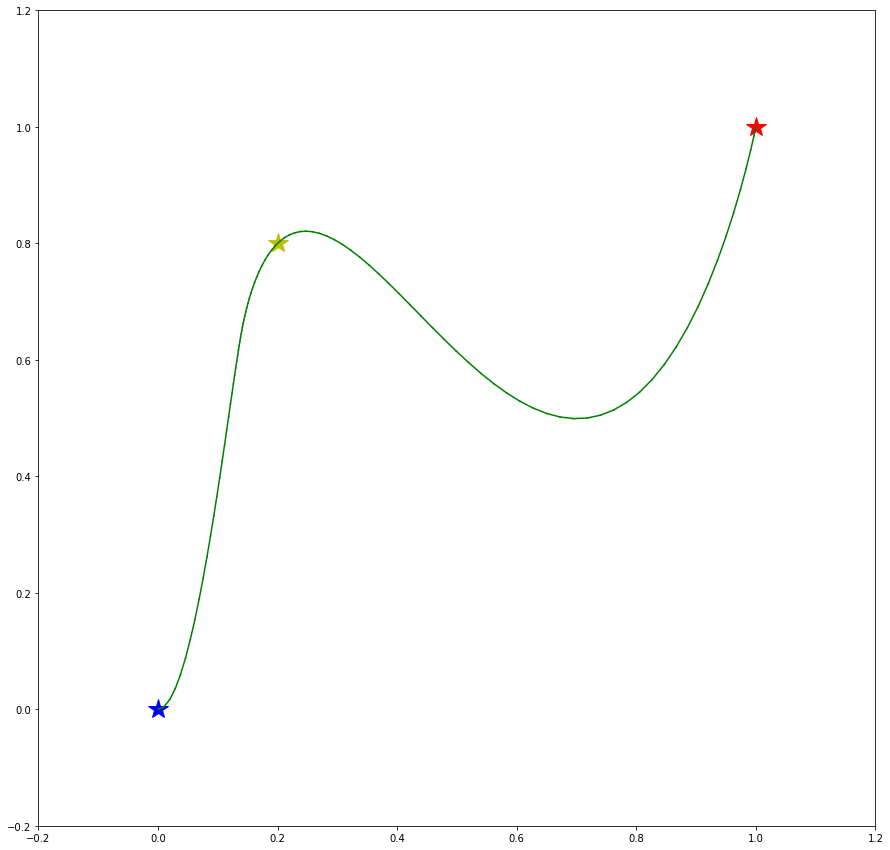

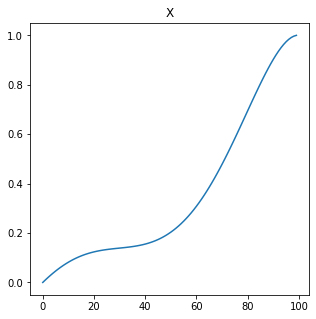

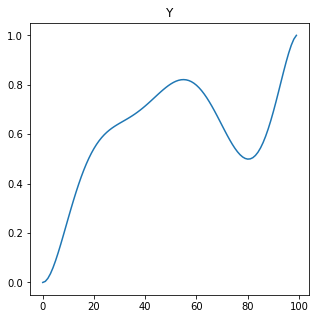

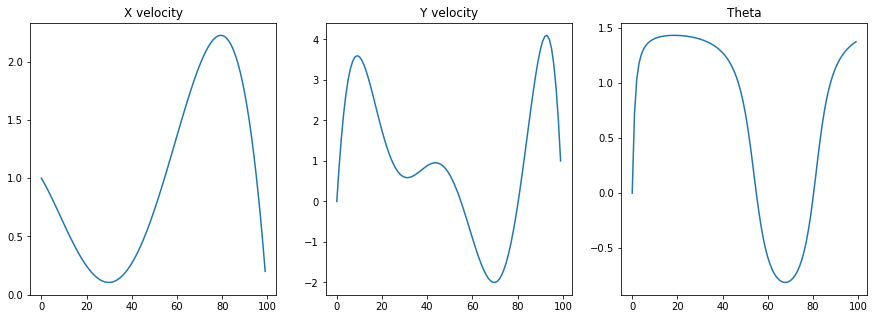

In [11]:
class BernsteinPlanner:

    class Constraint:
        def __init__(self, x, y, dx, dy, t):
            self.x = x
            self.y = y
            self.dx = dx
            self.dy = dy
            self.t = t
            
        @property
        def k(self):
            return self.dy / self.dx
        

    def __init__(self, pos_0, pos_f, pos_c):
        self.pos_0 = pos_0
        self.pos_f = pos_f
        self.pos_c = pos_c
        self.t_0, self.t_f = pos_0.t, pos_f.t
        self.w_x = self.compute_bernstein_x(pos_0, pos_f, pos_c)
        self.w_k = self.compute_bernstein_k(pos_0, pos_f, pos_c, self.w_x)

    @staticmethod
    def compute_bernstein_x(pos_0: Constraint, pos_f: Constraint, pos_c: Constraint):
        A = np.array([pos_0.x, pos_f.x, pos_c.x, pos_0.dx, pos_f.dx, pos_c.dx])
        B = np.array([
            get_bernstein_poly(pos_0.t, pos_0.t, pos_f.t),
            get_bernstein_poly(pos_0.t, pos_f.t, pos_f.t),
            get_bernstein_poly(pos_0.t, pos_c.t, pos_f.t),
            get_bernstein_differentials(pos_0.t, pos_0.t, pos_f.t),
            get_bernstein_differentials(pos_0.t, pos_f.t, pos_f.t),
            get_bernstein_differentials(pos_0.t, pos_c.t, pos_f.t),
        ])
        W = np.linalg.pinv(B) @ A
        return W

    @staticmethod
    def compute_bernstein_k(pos_0: Constraint, pos_f: Constraint, pos_c: Constraint, w: np.ndarray):
        A = np.array([pos_0.k, pos_f.k, pos_c.k, pos_0.y, pos_f.y, pos_c.y])
        B = np.array([
            get_bernstein_poly(pos_0.t, pos_0.t, pos_f.t),
            get_bernstein_poly(pos_0.t, pos_f.t, pos_f.t),
            get_bernstein_poly(pos_0.t, pos_c.t, pos_f.t),
            get_product_functions(w[0], w[1], w[2], w[3], w[4], w[5], pos_0.t, pos_0.t, pos_f.t),
            get_product_functions(w[0], w[1], w[2], w[3], w[4], w[5], pos_0.t, pos_f.t, pos_f.t),
            get_product_functions(w[0], w[1], w[2], w[3], w[4], w[5], pos_0.t, pos_c.t, pos_f.t),
        ])
        W = np.linalg.pinv(B) @ A
        return W
    
    def pos(self, t):
        B = np.array(get_bernstein_poly(self.t_0, t, self.t_f))
        x = np.dot(self.w_x, B)

        w = self.w_x
        F = get_product_functions(w[0], w[1], w[2], w[3], w[4], w[5], self.t_0, t, self.t_f)
        y = np.dot(self.w_k, F)
        
        return x, y

    def vel(self, t):
        B = np.array(get_bernstein_poly(self.t_0, t, self.t_f))
        Bd = np.array(get_bernstein_differentials(self.t_0, t, self.t_f))
        vx = np.dot(self.w_x, Bd)

        k = np.dot(self.w_k, B)
        vy = vx*k
        
        return vx, vy

    def orientation(self, t):
        B = np.array(get_bernstein_poly(self.t_0, t, self.t_f))
        k = np.dot(self.w_k, B)
        theta = np.arctan(k)
        
        return theta

    @staticmethod
    def render_pose(x, y, color, ax):
        ax.plot(x, y, f'{color}*', markersize=20)

    def plot_traj(self, points):
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.set_xlim([np.min(points[:, 0]) - 0.2, np.max(points[:, 0]) + 0.2])
        ax.set_ylim([np.min(points[:, 1]) - 0.2, np.max(points[:, 1]) + 0.2])
        
        self.render_pose(self.pos_0.x, self.pos_0.y, 'b', ax)
        self.render_pose(self.pos_f.x, self.pos_f.y, 'r', ax)
        self.render_pose(self.pos_c.x, self.pos_c.y, 'y', ax)

        for i in tqdm.tqdm(range(1, len(points))):
            ax.plot(
                [points[i][0], points[i-1][0]],
                [points[i][1], points[i-1][1]],
                color = 'g'
            )
            fig.savefig(f"videos/traj/snap_{i}.png")

        plt.show()

    def plot_coordinates(self, coord, name):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.plot(coord)
        ax.set_title(name)
        fig.savefig(f"outputs/position_{name}.png")
        plt.show()

    def plot_controls(self, velocity, theta):
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].plot(velocity[:, 0])
        ax[0].set_title("X velocity")
        ax[1].plot(velocity[:, 1])
        ax[1].set_title("Y velocity")
        ax[2].plot(theta)
        ax[2].set_title("Theta")
        fig.savefig(f"outputs/controls.png")
        plt.show()
        
b = BernsteinPlanner(
    BernsteinPlanner.Constraint(x=0.0, y=0.0, dx=1.0, dy=0.0, t=0.0),
    BernsteinPlanner.Constraint(x=1.0, y=1.0, dx=0.2, dy=1.0, t=1.0),
    BernsteinPlanner.Constraint(x=0.2, y=0.8, dx=0.7, dy=0.7, t=0.5),
)

points = np.array([b.pos(t) for t in np.linspace(b.t_0, b.t_f, num=100)])
velocity = np.array([b.vel(t) for t in np.linspace(b.t_0, b.t_f, num=100)])
theta = np.array([b.orientation(t) for t in np.linspace(b.t_0, b.t_f, num=100)])

b.plot_traj(points)
b.plot_coordinates(points[:, 0], "X")
b.plot_coordinates(points[:, 1], "Y")
b.plot_controls(velocity, theta)